In [35]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Importing data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('auto1_prep.csv', sep=',')
df

,brand,year,price,car_mileage,fuel,power,transmission
0,0,2006.0,8.584852,5.393628,0,2.0,2
1,1,2017.0,9.740969,5.351858,0,2.0,2
2,2,2015.0,9.629051,5.056246,0,2.0,2
3,0,2000.0,8.516993,5.703782,0,2.0,2
4,3,2010.0,9.937889,6.525030,0,3.0,1
...,...,...,...,...,...,...,...
212,0,2016.0,9.546741,5.135798,0,2.0,2
213,4,2010.0,9.332558,5.509388,0,2.0,2
214,3,2000.0,8.517193,5.521461,0,3.0,2
215,3,2001.0,8.922658,5.913503,0,2.0,1


# Correlations

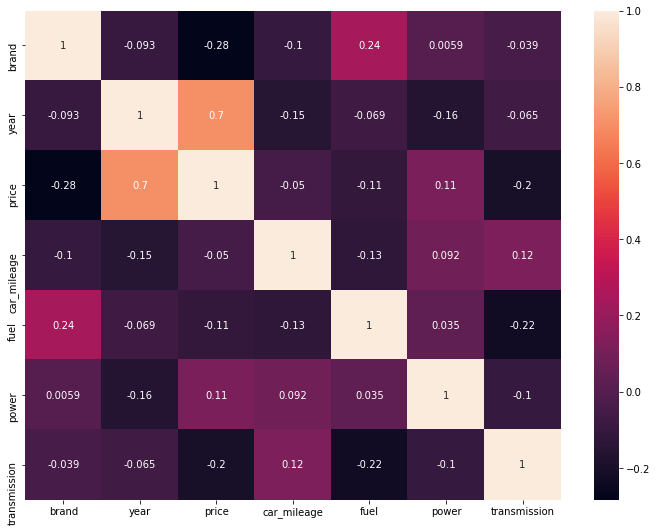

In [4]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Наибольшую корреляцию с ценой даёт год выпуска.
Таким образом, мы будем строить однофакторную модель: зависимость цены от года выпуска автомобиля.

# Splitting

In [5]:
X = df.iloc[:, [True,True,False,True,True,True,True]]
y = df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X

,brand,year,car_mileage,fuel,power,transmission
0,0,2006.0,5.393628,0,2.0,2
1,1,2017.0,5.351858,0,2.0,2
2,2,2015.0,5.056246,0,2.0,2
3,0,2000.0,5.703782,0,2.0,2
4,3,2010.0,6.525030,0,3.0,1
...,...,...,...,...,...,...
212,0,2016.0,5.135798,0,2.0,2
213,4,2010.0,5.509388,0,2.0,2
214,3,2000.0,5.521461,0,3.0,2
215,3,2001.0,5.913503,0,2.0,1


# Simple Linear Regression

In [6]:
f1 = ['year']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

sr.coef_, sr.intercept_

(array([0.06431211]), -119.97918461982725)

Т.е. price=0.064*year-119.979

In [7]:
y_pred = sr.predict(X_test[f1])

sr.score(X_train[f1], y_train).round(3), sr.score(X_test[f1], y_test).round(3)

(0.501, 0.429)

Год выпуска автомобиля на 50% объясняет вариацию цены.

In [8]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(0.37, 0.37)

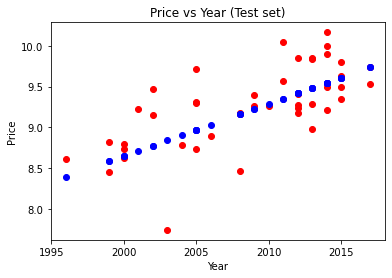

In [9]:
plt.scatter(X_test['year'], y_test, color = 'red')
plt.plot(X_test['year'], sr.predict(X_test[f1]), 'bo')
plt.title('Price vs Year (Test set)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Мы видим, что наибольший разброс в значениях наблюдается в среднем и высоком ценовом сегментах.
Это обусловлено тем, что достаточно большой разброс цен на автомобили одного года выпуска.

# Multiple Linear Regression

In [15]:
#!pip install statsmodels

In [16]:
mr = LinearRegression().fit(X_train, y_train)
mr.score(X_train, y_train).round(3)

0.613

Коэффициент детерминации увеличился и качество модели улучшилось.

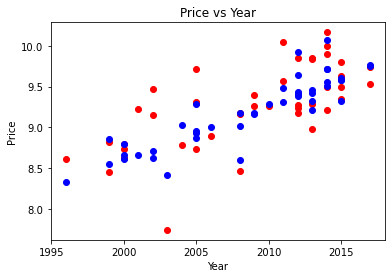

In [17]:
plt.scatter(X_test['year'], y_test, color = 'red')
plt.plot(X_test['year'], mr.predict(X_test), 'bo')
plt.title('Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Модель стала точнее, лучше описывает низкий и высокий ценовые сегменты. 

In [19]:
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     43.75
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           8.96e-32
Time:                        12:27:48   Log-Likelihood:                -52.175
No. Observations:                 173   AIC:                             118.4
Df Residuals:                     166   BIC:                             140.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -122.4719      9.177    -13.346      0.000    -140.590    -104.354
brand           -0.0251      0.006     -3.991      0.000      -0.038      -0.013
year             0.0654      0.005     14.397      0.000       0.056       0.074
car_mileage      0.0197      0.034      0.588      0.558      -0.046       0.086
fuel            -0.0474      0.058     -0.823      0.411      -0.161       0.066
power            0.3317      0.078      4.249      0.000       0.178       0.486
transmission    -0.1970      0.064     -3.065      0.003      -0.324      -0.070
==============================================================================
Omnibus:                        1.227   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.541   Jarque-Bera (JB):                0.855
Skew:                           0.123   Prob(JB):                        0.652
Kurtosis:                       3.241   Cond. No.                     7.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Переменные car_mileage, fuel и transmission не являются статистически значимыми.

# Recursive feature elimination

In [21]:
from sklearn.feature_selection import RFE
n_features = X.shape[1]
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 3)
selector = selector.fit(X, y)


selected_columns=[]
for i in range(n_features):
    if selector.support_[i] == True:
        selected_columns.append(i)
        
f_lm = []
for column in selected_columns:
    f_lm.append(X.columns[column])

In [23]:
f_lm = ['brand', 'year', 'power', 'transmission']
mr_rfe = LinearRegression().fit(X_train[f_lm], y_train)
mr_rfe.coef_, mr_rfe.intercept_

(array([-0.02660122,  0.06547615,  0.33273721, -0.18219662]),
 -122.57765940618968)

Т.е. price = -0.027*brand+0.065*year+0.33*power-0.18*transmission-122.578

In [24]:
y_pred = mr_rfe.predict(X_test[f_lm])
mr_rfe.score(X_train[f_lm], y_train).round(3)

0.61

Коэффициент детерминации стал немного меньше по сравнению с многофакторной моделью. 

In [25]:
mean_squared_error(y_train, mr_rfe.predict(X_train[f_lm]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(0.33, 0.31)

Среднеквадратическая ошибка улучшилсь по сравнению с однофакторной моделью. 
Т.е. данная модель лучше, чем модель от одной переменной.

# Backward Elimination

In [29]:
def backwardElimination(x, y, sl):
    x = sm.add_constant(x)
    numVars = x.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = x.drop(x.columns[j], axis=1)
    regressor_OLS.summary()
    return x

SL = 0.0001
X_Modeled = backwardElimination(X_train, y_train, SL)

In [30]:
mr_be = LinearRegression().fit(X_Modeled, y_train)
mr_be.score(X_Modeled, y_train).round(3)

0.59

Видим, что коэффициент детерминации в оптимизированной модели меньше, чем в модели с 4 факторами.

# Polynomial Regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)
pr = LinearRegression().fit(X_train_p, y_train)
pr.coef_, pr.intercept_

(array([ 8.80187743e-09,  6.25480804e+00, -3.79255515e-01, -2.64585722e+01,
         3.59744859e+01, -5.03898259e+01, -3.66507916e+01, -5.79275569e-03,
        -3.19020343e-03,  1.09292207e-02, -9.83128507e-02,  1.46550003e-02,
         7.24268473e-02,  7.48344213e-05,  1.29314049e-02, -1.77857164e-02,
         2.50746985e-02,  2.05761552e-02,  7.44300821e-03,  4.42472891e-01,
         9.97971828e-02,  1.34803293e-01, -6.53329445e-01,  5.00936517e-01,
        -1.08027799e+00, -8.42521596e-02,  1.07255661e-01, -1.97250067e+00]),
 467.2587894418824)

In [31]:
y_pred = pr.predict(X_test_p)
pr.score(X_train_p, y_train).round(3)

0.771

Коэффициент детерминации имеет наибольшее значение по сравнению с ранее построенными моделями.

In [32]:
mean_squared_error(y_train, pr.predict(X_train_p), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(0.25, 0.94)

Можем сделать вывод, что модель переобучена, является слишком сложной для наших данных. 

In [34]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()